In [1]:
from scipy.misc import imresize
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import h5py
import os.path
import sys
import time
%matplotlib inline

In [16]:
import numpy as np
import h5py

with h5py.File('cycle1.h5', 'a') as cycle:
    # get how many images are loaded , how many fails and how many total arrays there are
    numpy_images = cycle.attrs.__getitem__('count')
    load_fails = cycle.attrs.__getitem__('fail_delay')
    with h5py.File('clean0.h5', 'a') as clean:
        # track our progress in cleaning the data
        clean_count = clean.attrs.__getitem__('clean_count')
        clean_fail = clean.attrs.__getitem__('clean_fail')
        working_array = int(np.floor(clean_count/1000))
        print "clean_count, clean_fail, working_array", clean_count, clean_fail, working_array
        #working_array = clean.attrs.__getitem__('working_array')
        if clean_count%999 == 0:
           print("creating dataset", 'clean', str(working_array))
           clean.create_dataset('clean'+ str(working_array),data=np.zeros((1000,450,600,3))
                                 , compression="gzip", compression_opts=9)
           print('New keys',clean.keys())
        for cln_cnt in range(clean_count,numpy_images):
            updated_working_array = int(np.floor(cln_cnt/1000))
            within_clean = cln_cnt%1000
            within_dirty = (cln_cnt+clean_fail)%1000
            dirty_arr = int(np.floor((cln_cnt+clean_fail)/1000))
            print "updated_working_array, within_clean, within_dirty, dirty_arr", updated_working_array, within_clean, within_dirty, dirty_arr
            print('working on', cln_cnt, ' and ', cln_cnt+clean_fail )
            done = False
            while done == False:
              try:
                  clean.get('clean'+str(updated_working_array))[within_clean] = cycle.get('imgarray'+str(dirty_arr))[within_dirty]
                  print('clean',updated_working_array,' = imarray',dirty_arr,'-',within_dirty,'-')
                  clean_count += 1
                  clean.attrs.__setitem__('clean_count',clean_count)
                  print "successful update and increment"
                  done = True
              except:
                  clean_fail += 1
                  clean.attrs.__setitem__('clean_fail',clean_fail)
                  print('clean fail incremented to', clean_fail)


clean_count, clean_fail, working_array 5 0 0
updated_working_array, within_clean, within_dirty, dirty_arr 0 5 5 0
('working on', 5, ' and ', 5)
('clean', 0, ' = imarray', 0, '-', 5, '-')
successful update and increment
updated_working_array, within_clean, within_dirty, dirty_arr 0 6 6 0
('working on', 6, ' and ', 6)
('clean', 0, ' = imarray', 0, '-', 6, '-')
successful update and increment
updated_working_array, within_clean, within_dirty, dirty_arr 0 7 7 0
('working on', 7, ' and ', 7)
('clean', 0, ' = imarray', 0, '-', 7, '-')
successful update and increment


In [10]:
            print('working on', cln_cnt, ' and ', cln_cnt+clean_fail )
            done = False
            while done == False:
              try:
                  clean.get('clean'+str(updated_working_array))[within_clean] = cycle.get('imgarray'+str(dirty_arr))[within_dirty]
                  print('clean',updated_working_array,' = imarray',dirty_arr,'-',within_dirty,'-')
                  clean_count += 1                                               
                  clean.attrs.__setitem__('clean_count',clean_count)
                  done = True
              except:
                  clean_fail += 1 
                  clean.attrs.__setitem__('clean_fail',clean_fail)
                  print('clean fail incremented to', clean_fail)

<type 'numpy.int64'>
0


In [13]:
with h5py.File('clean0.h5', 'a') as clean:
    print(clean.keys())
    print([ clean.attrs.__getitem__(key) for key in clean.attrs.keys()])
    clean.attrs.__setitem__('clean_fail',0)
    clean.attrs.__setitem__('clean_count',0)
    clean.__delitem__('clean0')
    print(clean.keys())
    print([ clean.attrs.__getitem__(key) for key in clean.attrs.keys()])
    #clean.get('clean'+str(0))[0] = cycle.get('imgarray'+str(0))[0]
    #cleanset = np.array(clean.get('clean0')[0])
#imgplot = plt.imshow(cleanset.astype('uint8'))

[u'clean0', u'onehotlabels']
[0, 'cycle1.h5', 37, 0, 0]
[u'onehotlabels']
[0, 'cycle1.h5', 37, 0, 0]


In [ ]:
with h5py.File('cycle1.h5', 'a') as cycle:
    # get how many images are loaded , how many fails and how many total arrays there are
    numpy_images = cycle.attrs.__getitem__('count')
    load_fails = cycle.attrs.__getitem__('fail_delay')
    numarr = cycle.attrs.__getitem__('numarr')
    with h5py.File('clean0.h5', 'a') as clean:
        # track our progress in cleaning the data
        clean_count = clean.attrs.__getitem__('clean_count') 
        clean_fail = clean.attrs.__getitem__('clean_fail') 
        working_array = int(np.floor(clean_count/1000))
        #working_array = clean.attrs.__getitem__('working_array')
        if clean_count%999 == 0:  
           clean.create_dataset('clean'+ str(working_array),data=np.zeros((1000,450,600,3))
                                 , compression="gzip", compression_opts=9)
           print(clean.keys())
        for cln_cnt in range(clean_count,numpy_images):
            updated_working_array = int(np.floor(cln_cnt/1000))
            within_clean = cln_cnt%1000
            within_dirty = (cln_cnt+clean_fail)%1000 
            dirty_arr = int(np.floor((cln_cnt+clean_fail)/1000))
            print('working on', cln_cnt, ' and ', cln_cnt+clean_fail )
            done = False
            while done == False:
              try:
                  clean.get('clean'+str(updated_working_array))[within_clean] = cycle.get('imgarray'+str(dirty_arr))[within_dirty]
                  print('clean',i,' = imarray',dirty_arr,'-',within_dirty,'-')
                  clean_count += 1                                               
                  clean.attrs.__setitem__('clean_count',clean_count)
                  done = True
              except:
                  clean_fail += 1 
                  clean.attrs.__setitem__('clean_fail',clean_fail)
                  print('clean fail incremented to', clean_fail)

434
[ 0.  1.  0.  0.]
6257_RE.jpg


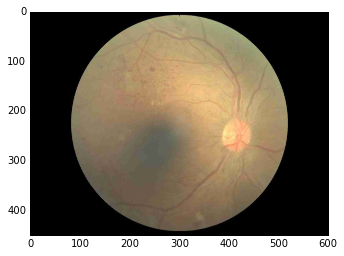

In [38]:
for i in range(434,900):
    if np.argmax(laset[i]) == 1:
        print i
        print(laset[i])
        print(imgnames[i])
        imgplot = plt.imshow(cleanset0[i].astype('uint8'))
        break 

In [5]:
import h5py



[u'onehotlabels']
[0, 'cycle1.h5', 37, 0, 0]


In [17]:
with h5py.File('cycle1.h5', 'a') as cycle1:
    print(cycle1.keys())
    print(type(cycle1.get('imgarray0')[0]))
    #clean0.create_dataset("onehotlabels",data=laset,compression="gzip",compression_opts=9)
    #clean0.attrs.__setitem__('clean_count',0) 
    #clean0.attrs.__setitem__('clean_fail',0) 
    #clean0.attrs.__setitem__('clean_fail',0) 
    #clean0.attrs.__setitem__('clean_source', 'cycle1.h5')

[u'imgarray0', u'imgarray1', u'imgarray10', u'imgarray11', u'imgarray12', u'imgarray13', u'imgarray14', u'imgarray15', u'imgarray16', u'imgarray17', u'imgarray18', u'imgarray19', u'imgarray2', u'imgarray20', u'imgarray21', u'imgarray22', u'imgarray23', u'imgarray24', u'imgarray25', u'imgarray26', u'imgarray27', u'imgarray28', u'imgarray29', u'imgarray3', u'imgarray30', u'imgarray31', u'imgarray32', u'imgarray33', u'imgarray34', u'imgarray35', u'imgarray36', u'imgarray37', u'imgarray4', u'imgarray5', u'imgarray6', u'imgarray7', u'imgarray8', u'imgarray9', u'imgnames', u'laset']
<type 'numpy.ndarray'>
